In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


**The purpose of this notebook is to advance my knowledge in Python**


**About Dataset**
* 
***Data Science Job Salaries Dataset contains 11 columns, each are:***

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

Load the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#load the dataset
df_s = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

**data  glimpse**

In [4]:
df_s.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
636,2023,SE,FT,Data Scientist,102500,USD,102500,US,100,US,M
3473,2022,EN,FT,Data Analytics Engineer,20000,USD,20000,PK,0,PK,M
683,2023,MI,FT,Data Analyst,160000,USD,160000,US,0,US,M
3084,2022,SE,FT,Data Engineer,250000,USD,250000,US,0,US,M
2656,2022,SE,FT,Data Engineer,70000,EUR,73546,PT,0,PT,M


In [5]:
df_s.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df_s.corr()

/tmp/ipykernel_34/3616486076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_s.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


In [8]:
#let's see how many distinct value in each column
df_s['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [9]:
df_s['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [10]:
df_s['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [11]:
df_s['job_title'].value_counts()



Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

let's check it on the chart bar

<AxesSubplot: >

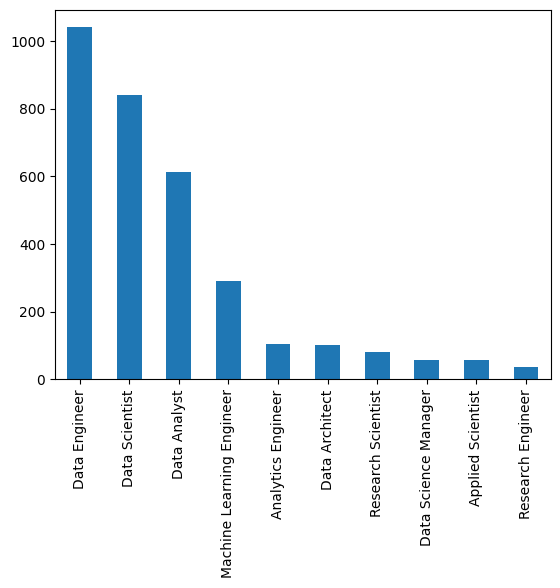

In [12]:
df_s['job_title'].value_counts().head(10).plot.bar()

<AxesSubplot: >

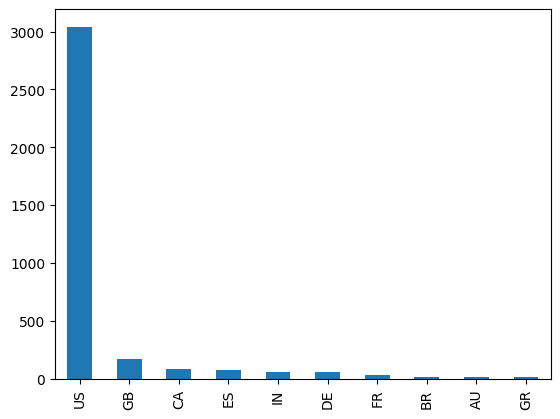

In [13]:
df_s['company_location'].value_counts().head(10).plot.bar()

<AxesSubplot: >

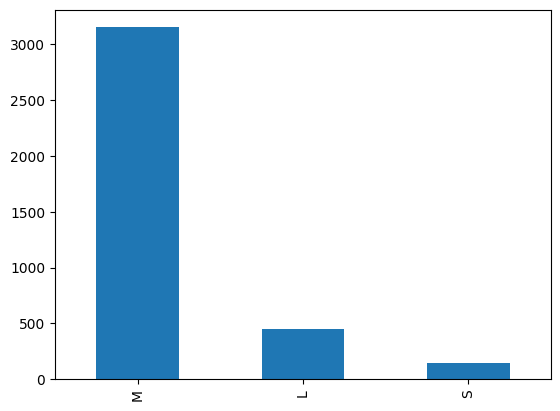

In [14]:
df_s['company_size'].value_counts().plot.bar()

<AxesSubplot: >

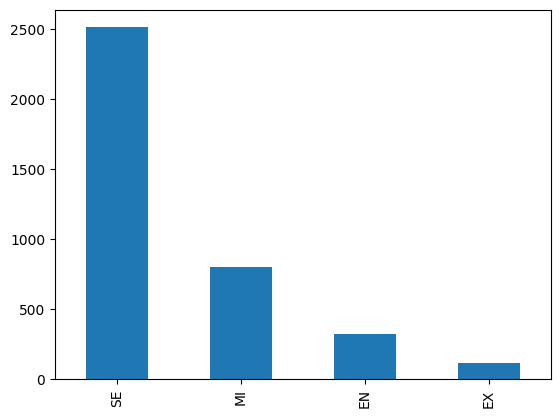

In [15]:
df_s['experience_level'].value_counts().plot.bar()

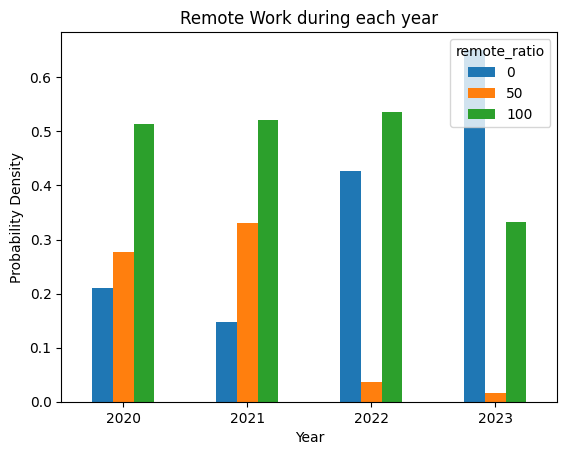

In [16]:

pd.crosstab(df_s['work_year'],df_s['remote_ratio'], normalize = 'index').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Remote Work during each year')
plt.show()

<AxesSubplot: xlabel='work_year', ylabel='salary_in_usd'>

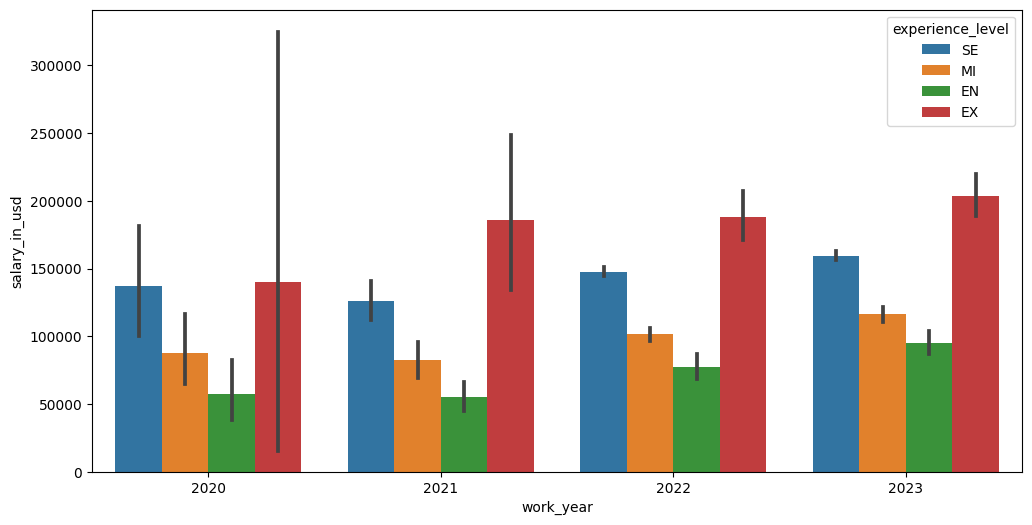

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_s,x='work_year',y='salary_in_usd',hue='experience_level')

<AxesSubplot: >

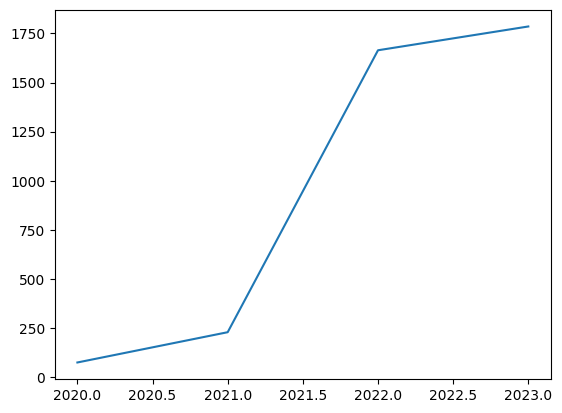

In [18]:
df_s['work_year'].value_counts(). sort_index(). plot.line()

In [19]:
top_salary =  df_s.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(15)
top_salary.head(15)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Data Science Manager,191278.78


**Let's make a list of jobs with salary above 400k**

In [20]:
df_s[df_s['salary_in_usd'] > 400000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
